In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv(
    'D:\\Đại học\\Ds108 - Tiền xử lý dữ liệu\\Scraping\\data\\Silver_layer\\cleaned_file_1.csv')
df.head()

,id,brand,price,destination,hand_luggage,checked_baggage,start_hour,end_hour,trip_mins,is_holiday,days_left
0,PQC0002,Bamboo Airways,1245267,Phú Quốc (PQC)\nSân bay Phú Quốc,7,0,Evening,Evening,60,2,1
1,PQC0323,Vietravel Airlines,1224930,Phú Quốc (PQC)\nSân bay Phú Quốc,7,0,Evening,Evening,60,2,1
2,PQC0292,Vietnam Airlines,1535463,Phú Quốc (PQC)\nSân bay Phú Quốc,12,23,Evening,Evening,60,2,1
3,PQC0109,VietJet Air,1567000,Phú Quốc (PQC)\nSân bay Phú Quốc,7,0,Afternoon,Evening,60,2,1
4,PQC0132,VietJet Air,1567000,Phú Quốc (PQC)\nSân bay Phú Quốc,7,0,Evening,Evening,65,2,1


In [4]:
df = df[~(df['days_left'] == 0)]

In [5]:
df.describe()

,price,hand_luggage,checked_baggage,trip_mins,is_holiday,days_left
count,4.654900e+04,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000
mean,2.066625e+06,9.219532,10.357022,99.895594,0.985864,10.535694
std,7.058187e+05,2.460549,11.413462,28.300063,0.986337,5.935772
min,6.902700e+05,7.000000,0.000000,45.000000,0.000000,1.000000
25%,1.592995e+06,7.000000,0.000000,80.000000,0.000000,6.000000
50%,1.945053e+06,7.000000,0.000000,115.000000,1.000000,10.000000
75%,2.436792e+06,12.000000,23.000000,125.000000,2.000000,15.000000
max,6.217970e+06,12.000000,23.000000,145.000000,3.000000,34.000000


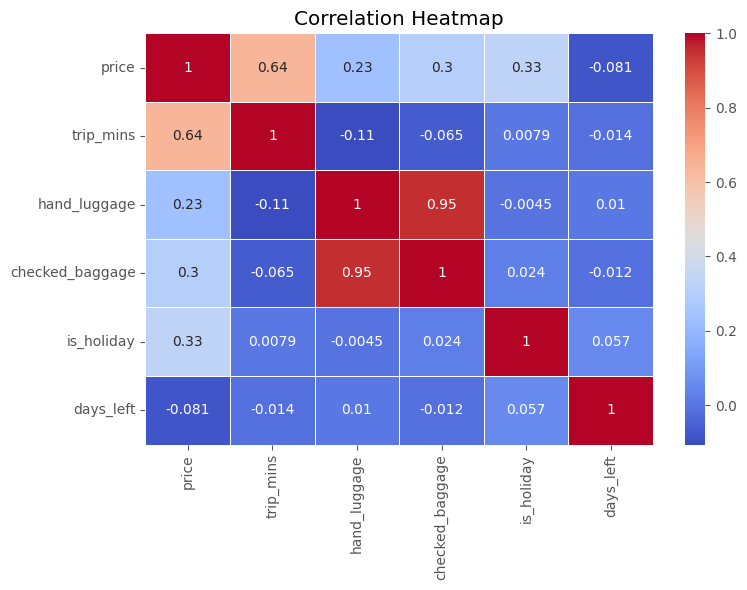

In [6]:
corr_matrix = df[['price', 'trip_mins', 'hand_luggage',
                  'checked_baggage', 'is_holiday', 'days_left']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# FLIGHT & AIRLINES

In [7]:
df1 = df.groupby(['id', 'brand'], as_index=False).count()
df1.brand.value_counts()

brand
Vietnam Airlines      1447
VietJet Air           1360
Bamboo Airways         206
Vietravel Airlines      63
Name: count, dtype: int64

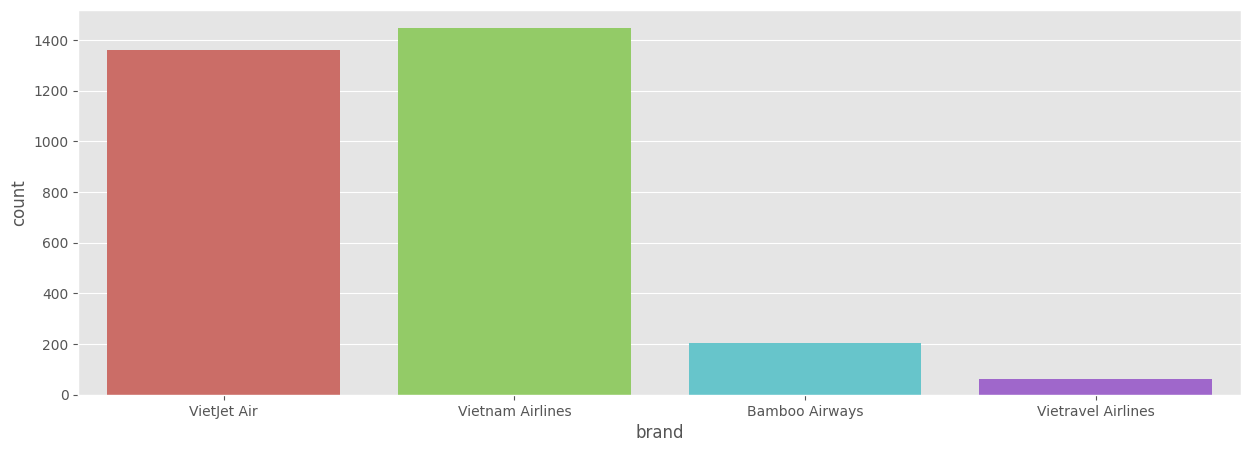

In [8]:
plt.figure(figsize=(15, 5))
sns.countplot(
    x='brand',
    data=df1,
    hue='brand',
    palette='hls',
    legend=False)
plt.show()

# PRICE & AIRLINES

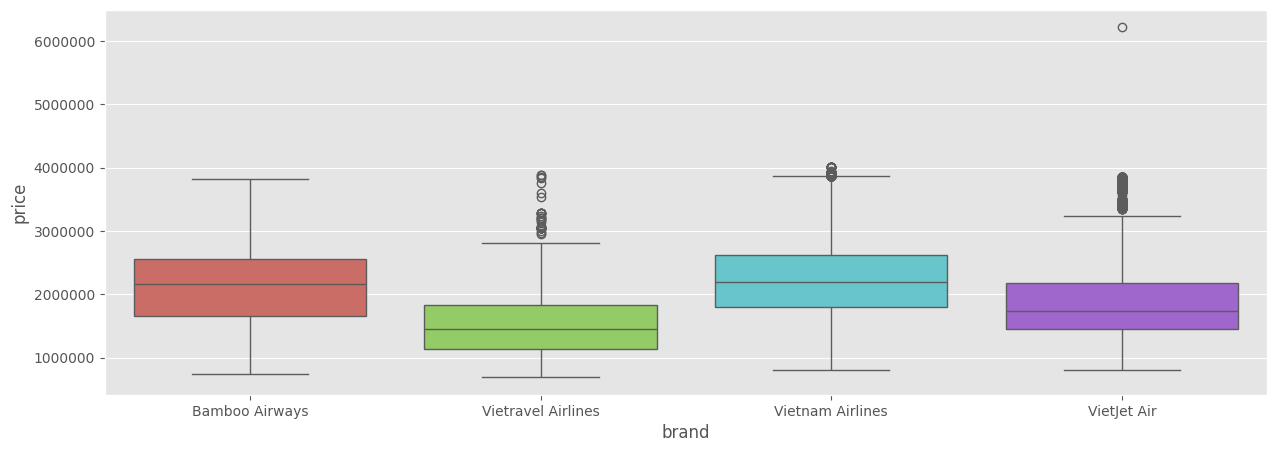

In [9]:
plt.figure(figsize=(15, 5))
sns.boxplot(
    x='brand',
    y='price',
    data=df,
    hue='brand',
    palette='hls',
    legend=False
)
plt.ticklabel_format(style='plain', axis='y')

PRICE:

- max: VietNam

- min: Viettravel

UNUSUAL: Viettravel

# PRICE & TIME

<Axes: xlabel='end_hour', ylabel='price'>

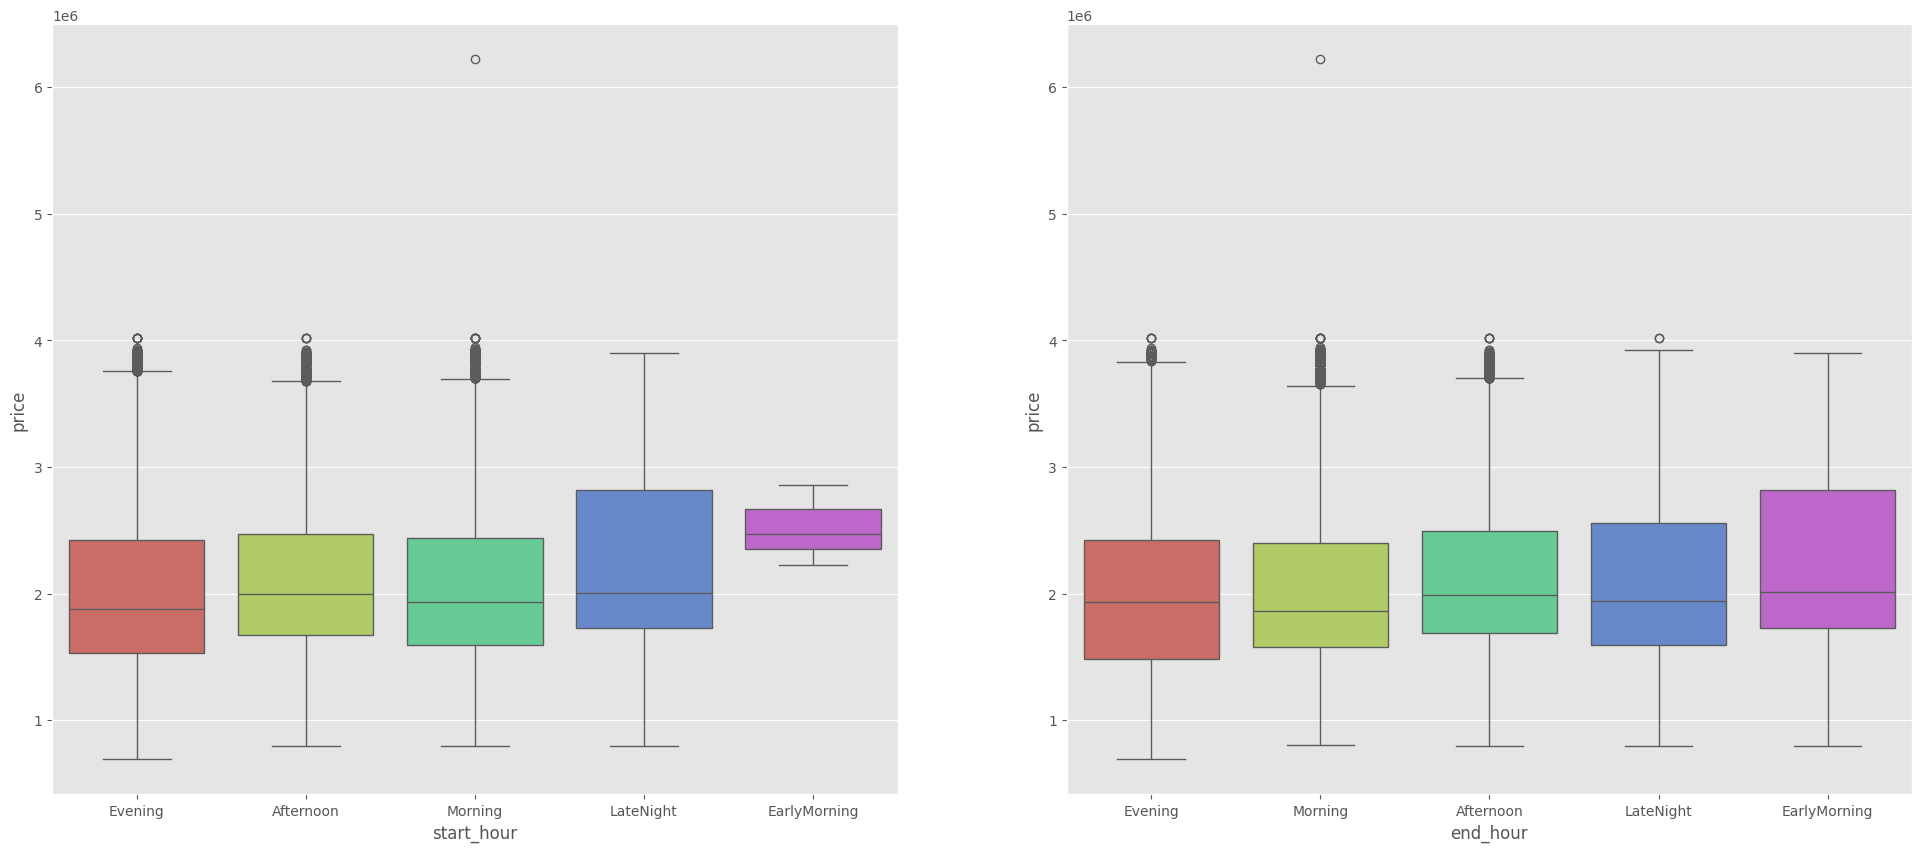

In [10]:
plt.figure(figsize=(24, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x='start_hour', y='price', data=df,
            hue='start_hour', palette='hls', legend=False)

plt.subplot(1, 2, 2)
sns.boxplot(x='end_hour', y='price', data=df,
            hue='end_hour', palette='hls', legend=False)

The price max is mostly the same for all category:

- Biggest price range: LateNight (21h-24h)

- Smallest price range + the most stable: Early Morning (0h-3h)

In [24]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(
    df,
    columns=[
        'start_hour',
        'end_hour'])
data = data.drop(columns=['id', 'brand', 'destination'])

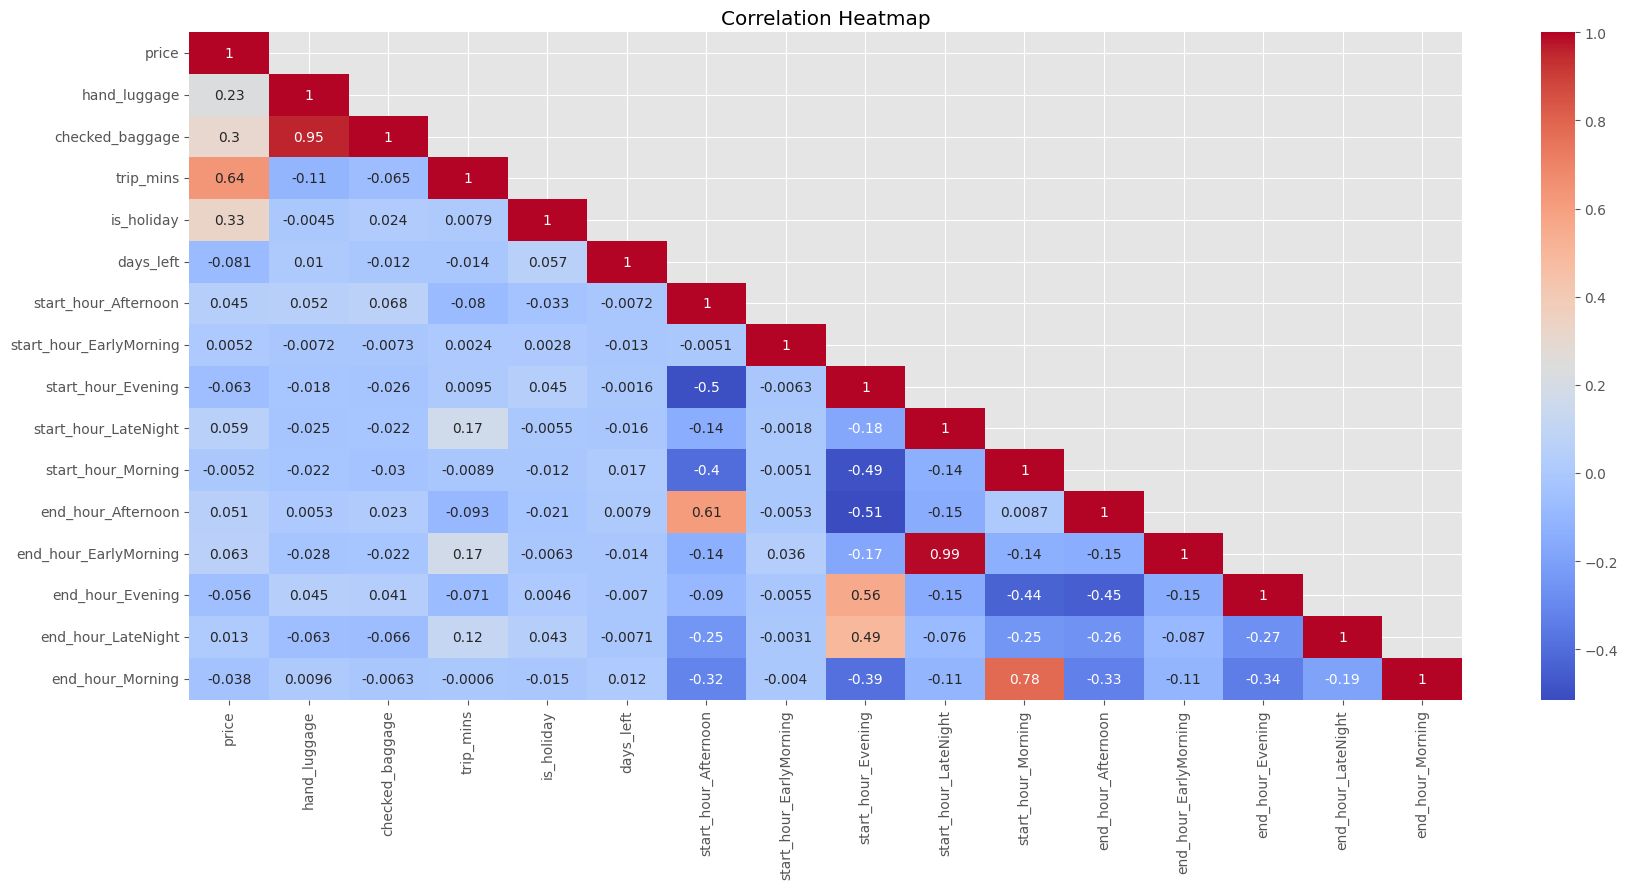

In [28]:
data_corr = data.corr()
mask = np.triu(np.ones_like(data_corr, dtype=bool), k=1)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(18, 9))
sns.heatmap(data_corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# PRICE & DESTINATION

<Axes: xlabel='destination', ylabel='price'>

) missing from font(s) DejaVu Sans.n\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.n\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


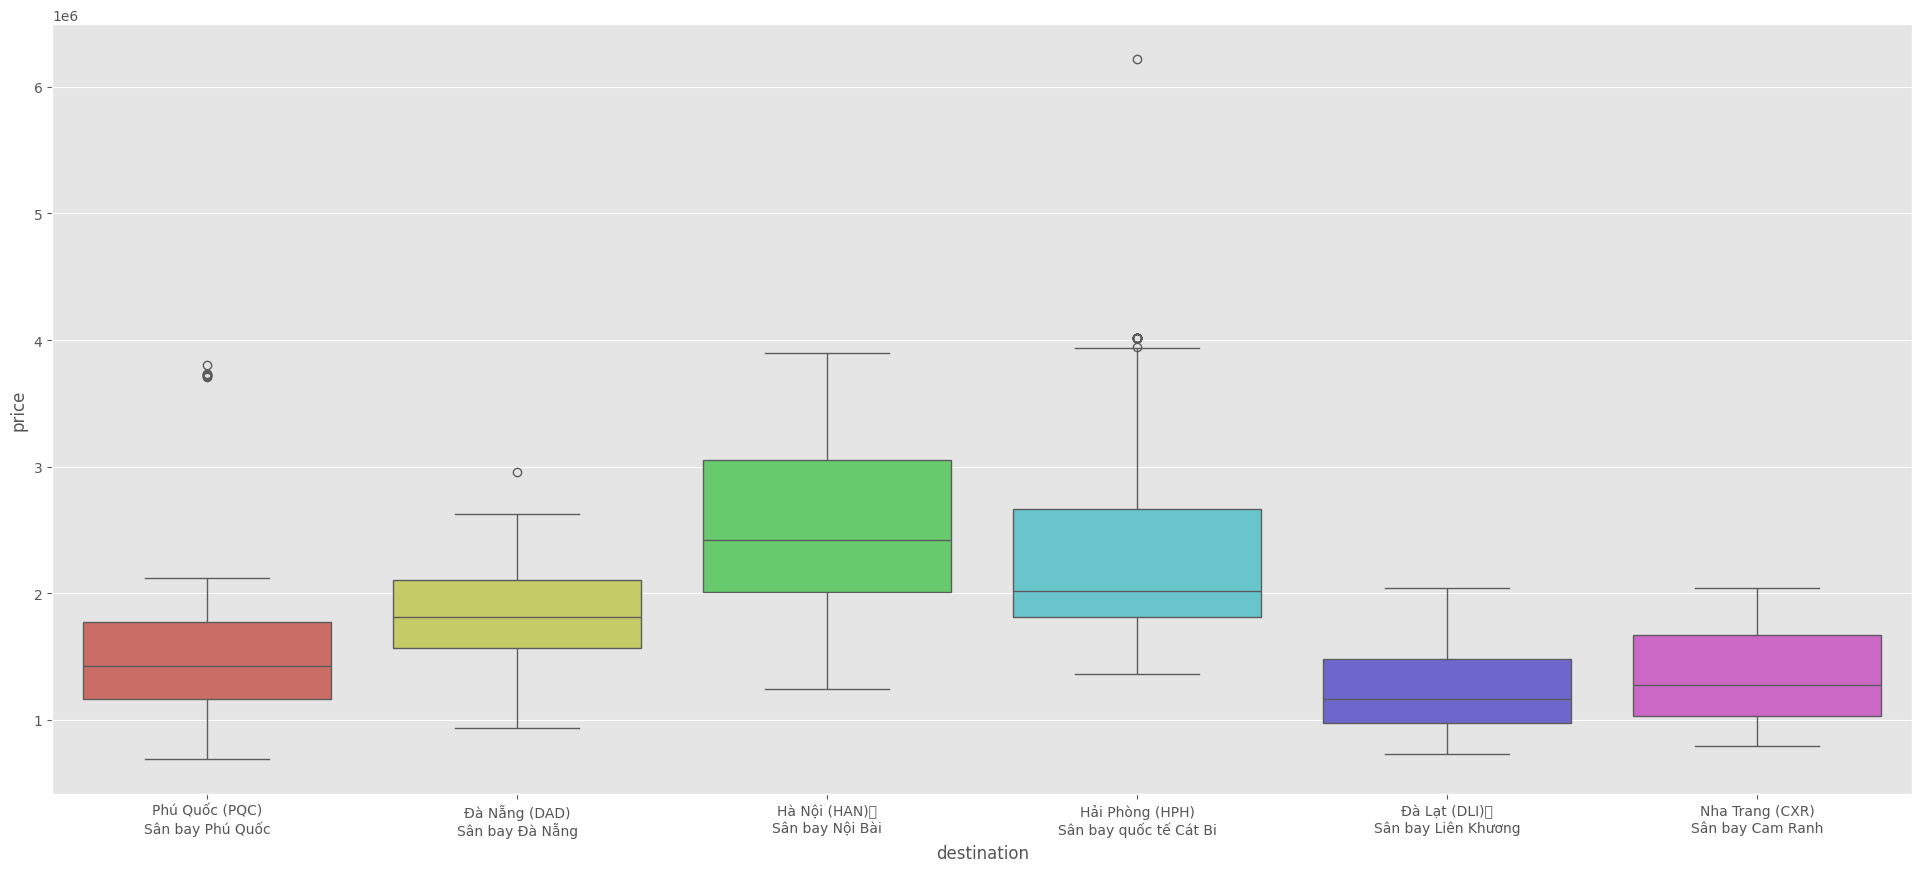

In [13]:
plt.figure(figsize=(24, 10))

sns.boxplot(x='destination', y='price', data=df,
            hue='destination', palette='hls', legend=False)

In [14]:
# Split data based on brand
Bamboo = df[df['brand'] == 'Bamboo Airways']
Vietjet = df[df['brand'] == 'VietJet Air']
Vietnam = df[df['brand'] == 'Vietnam Airlines']
Vietravel = df[df['brand'] == 'Vietravel Airlines']

In [15]:
# Function to plot line charts for each destination
def lineplot(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
    axes = axes.flatten()

    i = 0
    for des in data['destination'].unique():
        print(
            f'Destination: {des}, count: {len(data[data["destination"] == des])}')
        df = data[data['destination'] == des]
        sns.lineplot(
            ax=axes[i],
            x='days_left',
            y='price',
            data=df,
            color='blue')
        axes[i].set_title(f'{df["brand"].unique()[0]} - {des}')
        axes[i].set_xlabel('Days Left')
        axes[i].set_ylabel('Price')
        i += 1

    # Ẩn các subplot còn thừa nếu có
    for j in range(i, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

Destination: Phú Quốc (PQC)
Sân bay Phú Quốc, count: 242
Destination: Đà Nẵng (DAD)
Sân bay Đà Nẵng, count: 581
Destination: Hà Nội (HAN)
Sân bay Nội Bài, count: 1883
Destination: Hải Phòng (HPH)
Sân bay quốc tế Cát Bi, count: 201
Destination: Đà Lạt (DLI)
Sân bay Liên Khương, count: 225


) missing from font(s) DejaVu Sans.ykernel_21628\2967437257.py:26: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.n\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


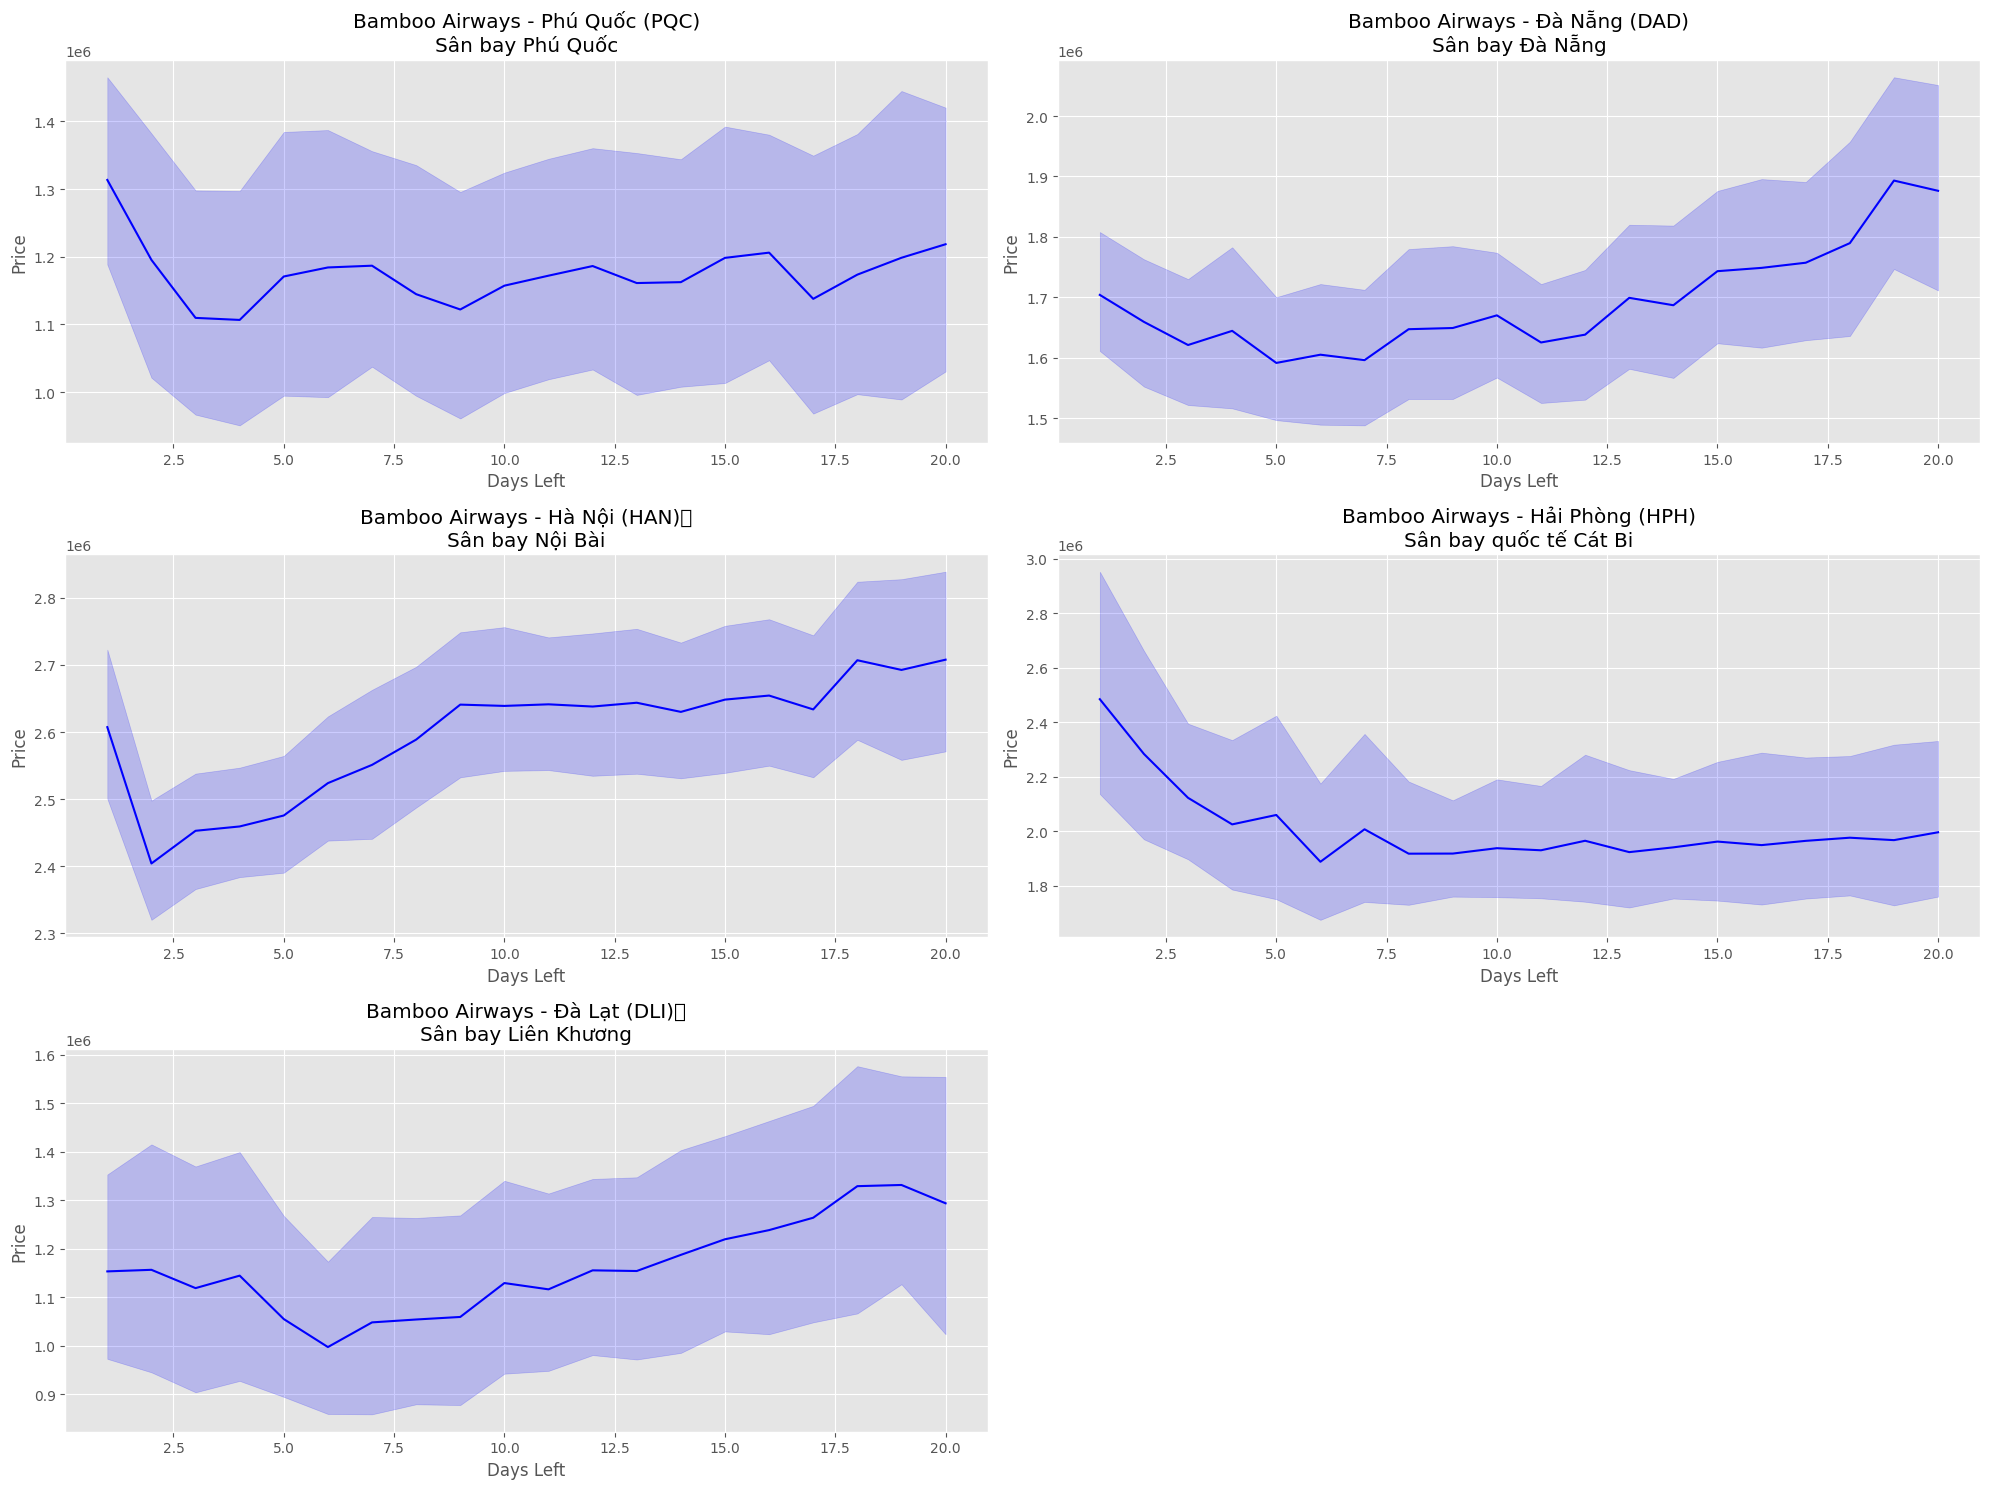

In [16]:
lineplot(Bamboo[Bamboo['days_left'] <= 20])

Destination: Phú Quốc (PQC)
Sân bay Phú Quốc, count: 2214
Destination: Đà Nẵng (DAD)
Sân bay Đà Nẵng, count: 5340
Destination: Hà Nội (HAN)
Sân bay Nội Bài, count: 8837
Destination: Hải Phòng (HPH)
Sân bay quốc tế Cát Bi, count: 2645
Destination: Đà Lạt (DLI)
Sân bay Liên Khương, count: 486
Destination: Nha Trang (CXR)
Sân bay Cam Ranh, count: 1121


) missing from font(s) DejaVu Sans.ykernel_21628\2967437257.py:26: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.n\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


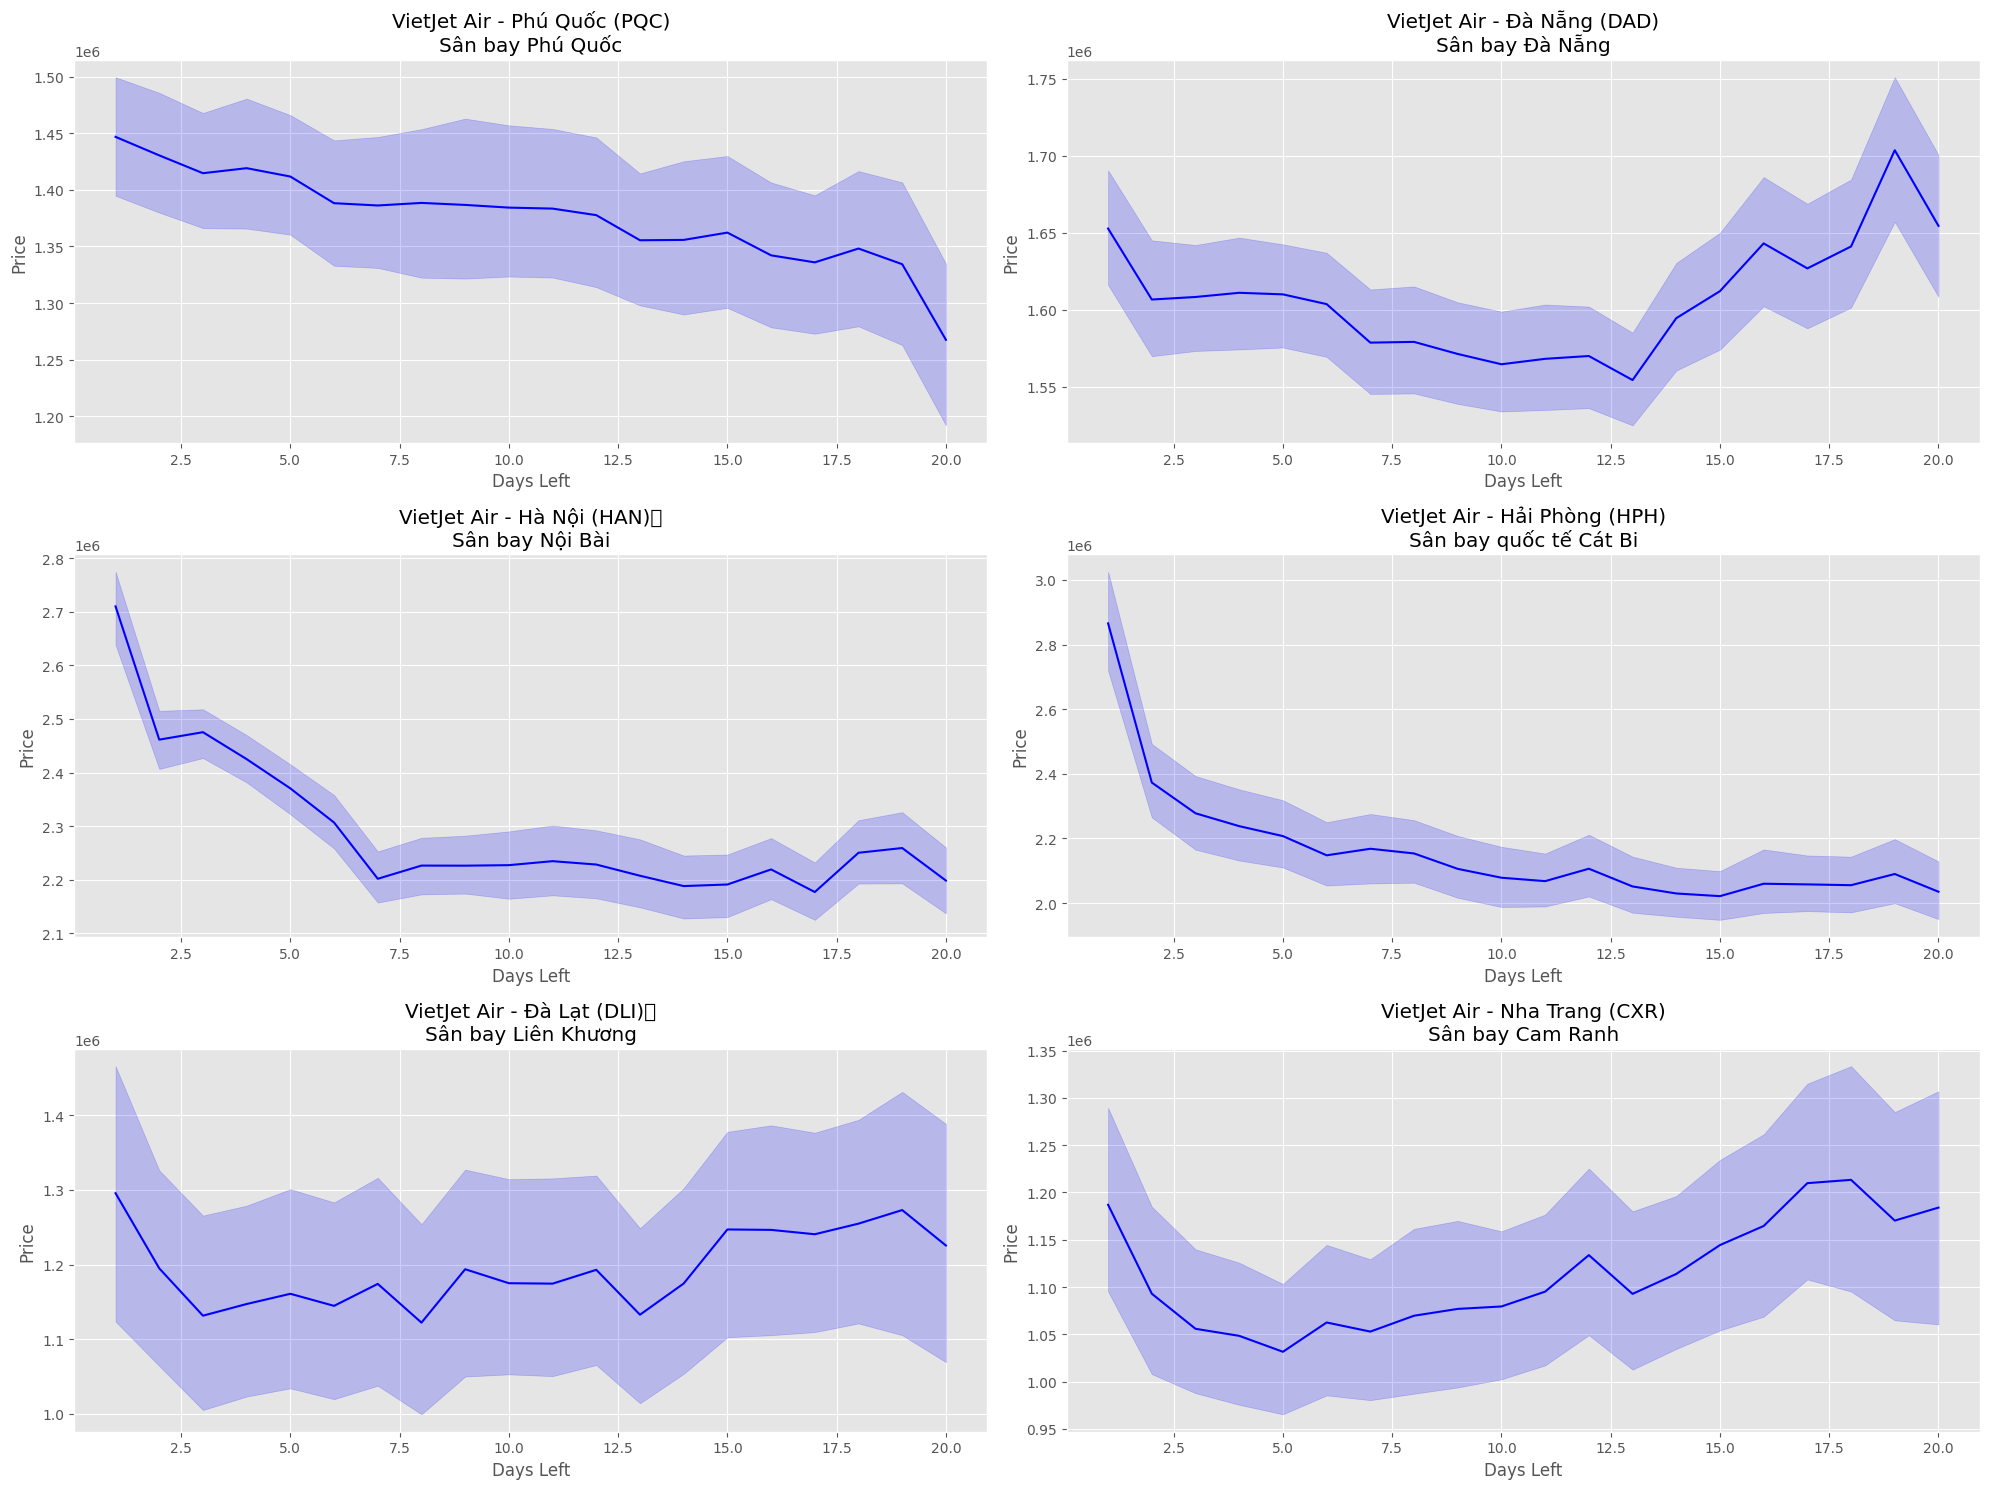

In [17]:
lineplot(Vietjet[Vietjet['days_left'] <= 20])

Destination: Phú Quốc (PQC)
Sân bay Phú Quốc, count: 2200
Destination: Đà Nẵng (DAD)
Sân bay Đà Nẵng, count: 5856
Destination: Hà Nội (HAN)
Sân bay Nội Bài, count: 8182
Destination: Hải Phòng (HPH)
Sân bay quốc tế Cát Bi, count: 1176
Destination: Đà Lạt (DLI)
Sân bay Liên Khương, count: 1124
Destination: Nha Trang (CXR)
Sân bay Cam Ranh, count: 2051


) missing from font(s) DejaVu Sans.ykernel_21628\2967437257.py:26: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.n\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


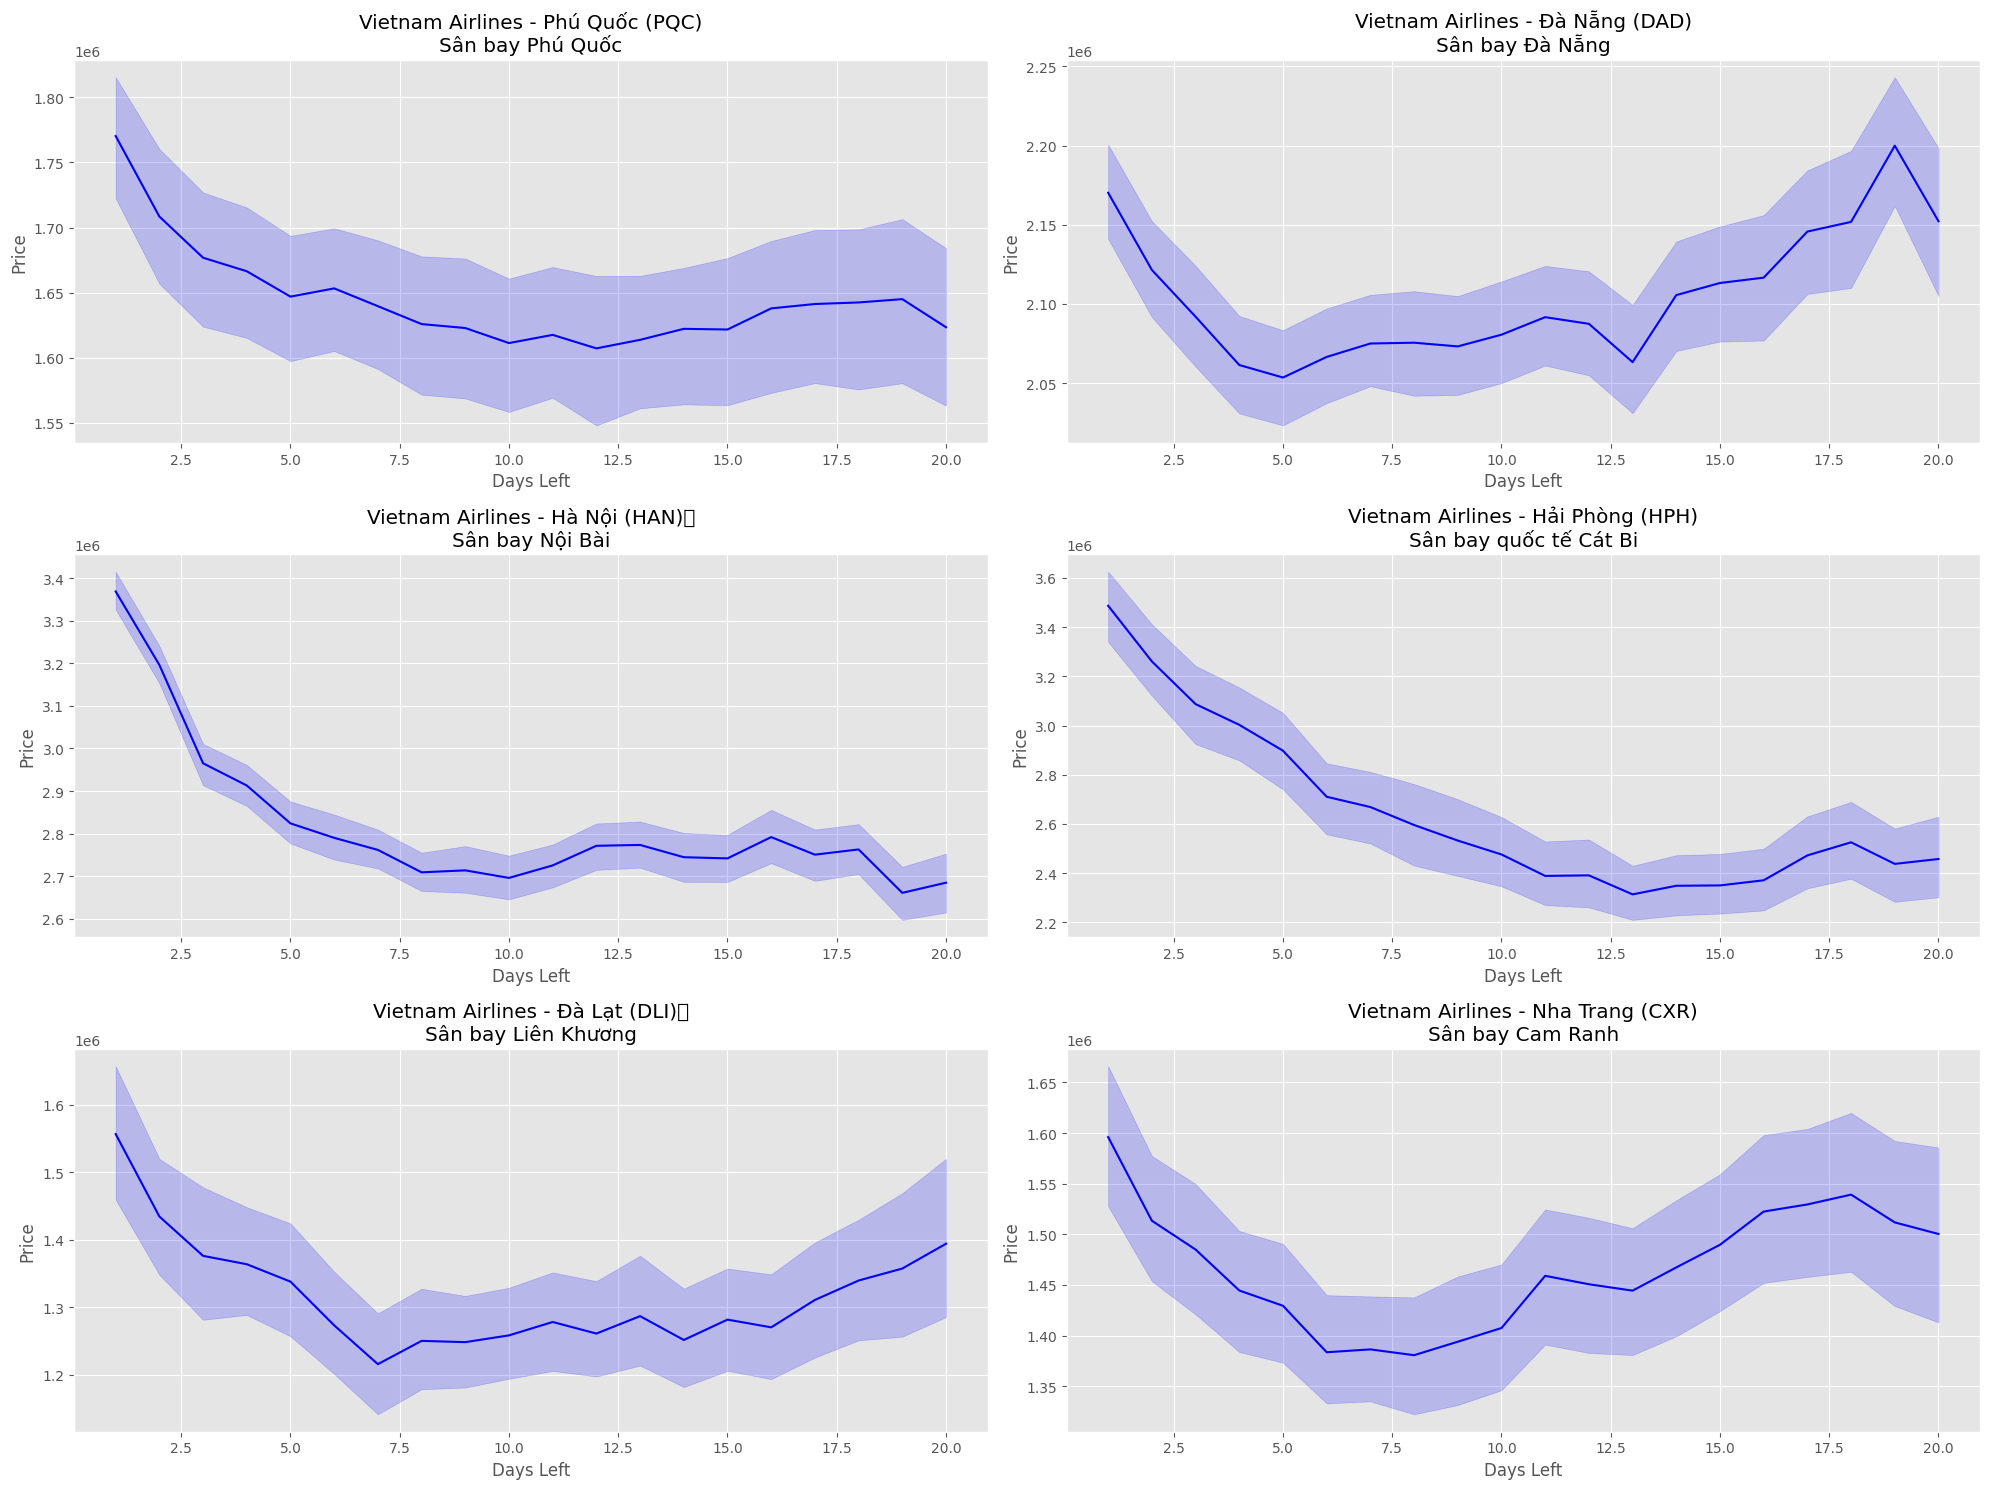

In [18]:
lineplot(Vietnam[Vietnam['days_left'] <= 20])

Destination: Phú Quốc (PQC)
Sân bay Phú Quốc, count: 370
Destination: Đà Nẵng (DAD)
Sân bay Đà Nẵng, count: 383
Destination: Hà Nội (HAN)
Sân bay Nội Bài, count: 380


) missing from font(s) DejaVu Sans.ykernel_21628\2967437257.py:26: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.n\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


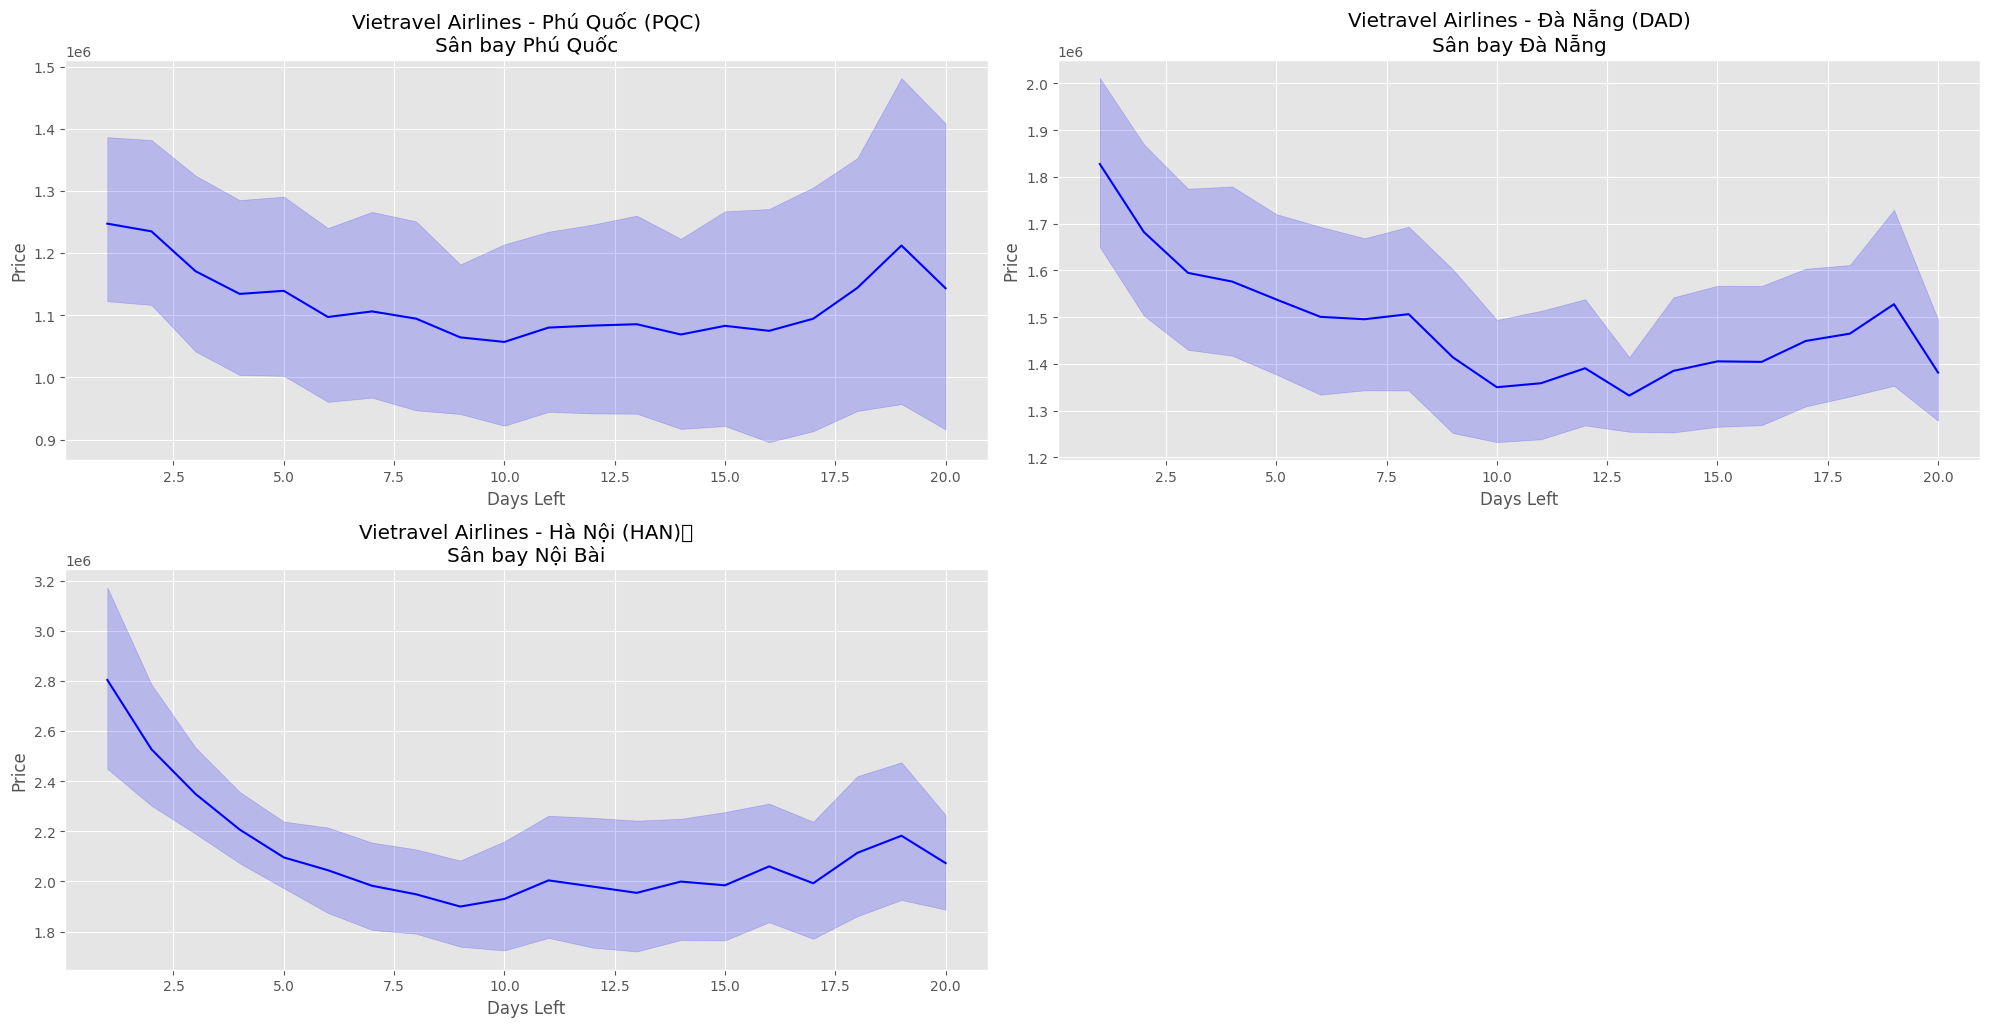

In [19]:
lineplot(Vietravel[Vietravel['days_left'] <= 20])

# PRICE & TRIP_TIME

In [20]:
df['trip_mins'].value_counts()

trip_mins
130    11287
125     8404
85      6576
60      4950
80      4871
120     3341
65      2602
55      2079
75       905
90       760
115      409
45       334
135       26
50         4
145        1
Name: count, dtype: int64

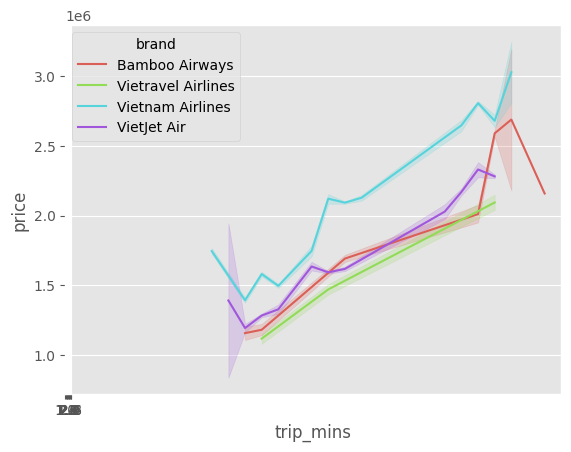

In [21]:
sns.lineplot(data=df, x='trip_mins', y='price', hue='brand', palette='hls')
plt.xticks(np.arange(1.0, 3.0, 0.2))
plt.grid(True)
plt.show()